# Air Quality Data Analysis

Next dataset will be used to develop **regression** DS library . It can be downloaded [here](https://mega.nz/#!gsVzAQJK!Z_oBZkrSuwNKBMYxBaRYHsvA3SNAH-W_fa5B_kcmP14).

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_brute = pd.read_csv('../datasets/AirQualityUCI.csv', sep=';')

In [3]:
df_brute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [4]:
df_brute.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [5]:
df_brute.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


## Adapt the dataframe

In [6]:
# Remove the unnammed columns
df=df_brute[['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']]

In [7]:
print('before: ' + str(df.shape))
df.dropna(inplace=True)
print('after: ' + str(df.shape))

before: (9471, 15)
after: (9357, 15)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Adapt the time:

In [8]:
def toDateTime(row):
    date = str(row[0])
    time = str(row[1])
    return datetime.strptime(date + ' ' + time,'%d/%m/%Y %H.%M.%S')

In [9]:
df['timestamp']=df[['Date','Time']].apply(toDateTime, axis=1)
df.drop(labels=['Date','Time'],axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Adapt text measures:

In [10]:
def toNumber(value):
    return float(value.replace(',','.'))

In [11]:
df['CO(GT)']=df['CO(GT)'].apply(toNumber)
df['C6H6(GT)']=df['C6H6(GT)'].apply(toNumber)
df['T']=df['T'].apply(toNumber)
df['RH']=df['RH'].apply(toNumber)
df['AH']=df['AH'].apply(toNumber)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

Fix invalid values:

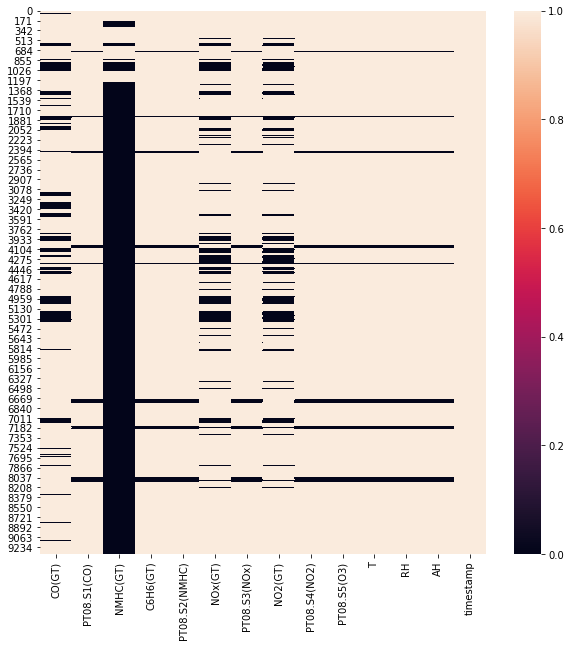

In [12]:
# Lets search firstly values invalid under 0
plt.subplots(figsize=(10,10))
sns.heatmap(df>0)

In [13]:
print('before: ' + str(df.shape))
#df=df[df['CO(GT)']>=0]
df=df[df['PT08.S1(CO)']>=0]
df=df[df['NOx(GT)']>=0]
df=df[df['NO2(GT)']>=0]
#df=df[df['NMHC(GT)']>=0]
df=df[df['T']>=0]
print('after: ' + str(df.shape))

before: (9357, 14)
after: (7381, 14)


In [14]:
df.drop(labels=['CO(GT)','NMHC(GT)'],inplace=True, axis=1)

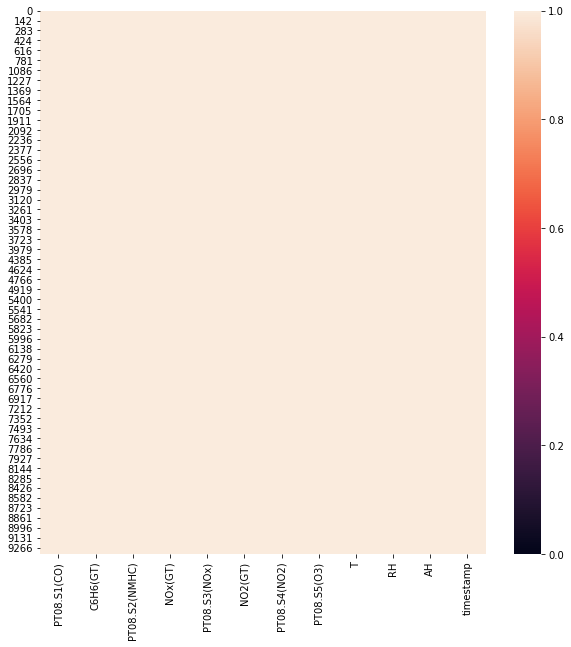

In [15]:
# Lets see again values invalid under 0
plt.subplots(figsize=(10,10))
sns.heatmap(df>0)

# Graphical Analysis

Let's see some visualizations for the dataset

In [16]:
ts_test=df.iloc[0]['timestamp']

In [17]:
df['month']=df['timestamp'].apply(lambda x: x.month)
df['seasson']=df['month'].apply(lambda x: int(x/3)%4)
df['day_of_week']=df['timestamp'].apply(lambda x: x.dayofweek)

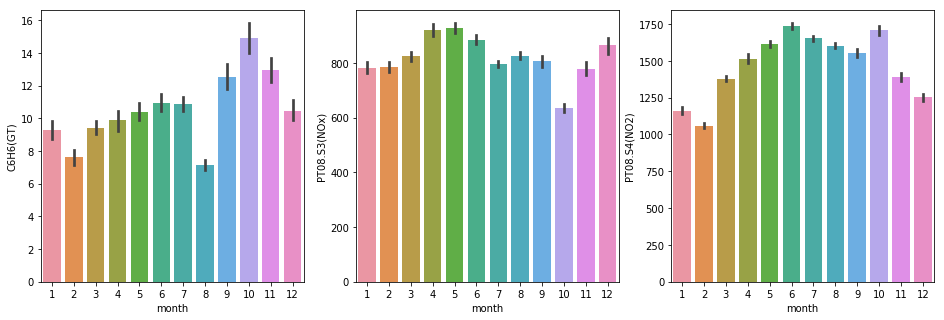

In [18]:
plt.subplots(figsize=(16,5))
plt.subplot(131)
sns.barplot(data=df,x='month',y='C6H6(GT)',estimator=np.average)
plt.subplot(132)
sns.barplot(data=df,x='month',y='PT08.S3(NOx)',estimator=np.average)
plt.subplot(133)
sns.barplot(data=df,x='month',y='PT08.S4(NO2)',estimator=np.average)

Text(0.5,1,'autumn')

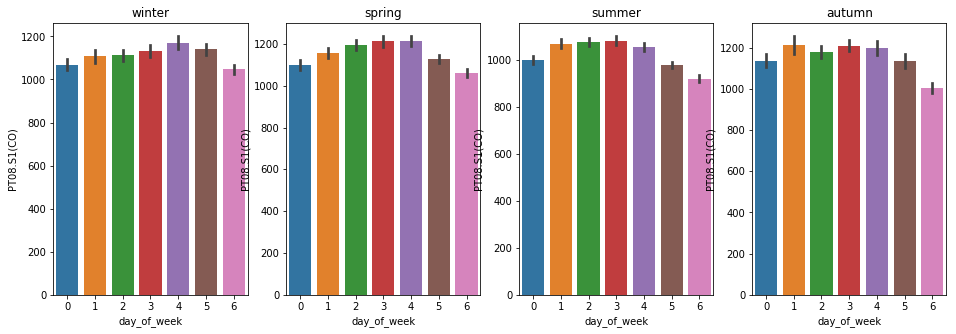

In [19]:
plt.subplots(figsize=(16,5))
plt.subplot(141)
sns.barplot(data=df[df['seasson']==0],x='day_of_week',y='PT08.S1(CO)',estimator=np.average)
plt.title('winter')
plt.subplot(142)
sns.barplot(data=df[df['seasson']==1],x='day_of_week',y='PT08.S1(CO)',estimator=np.average)
plt.title('spring')
plt.subplot(143)
sns.barplot(data=df[df['seasson']==2],x='day_of_week',y='PT08.S1(CO)',estimator=np.average)
plt.title('summer')
plt.subplot(144)
sns.barplot(data=df[df['seasson']==3],x='day_of_week',y='PT08.S1(CO)',estimator=np.average)
plt.title('autumn')

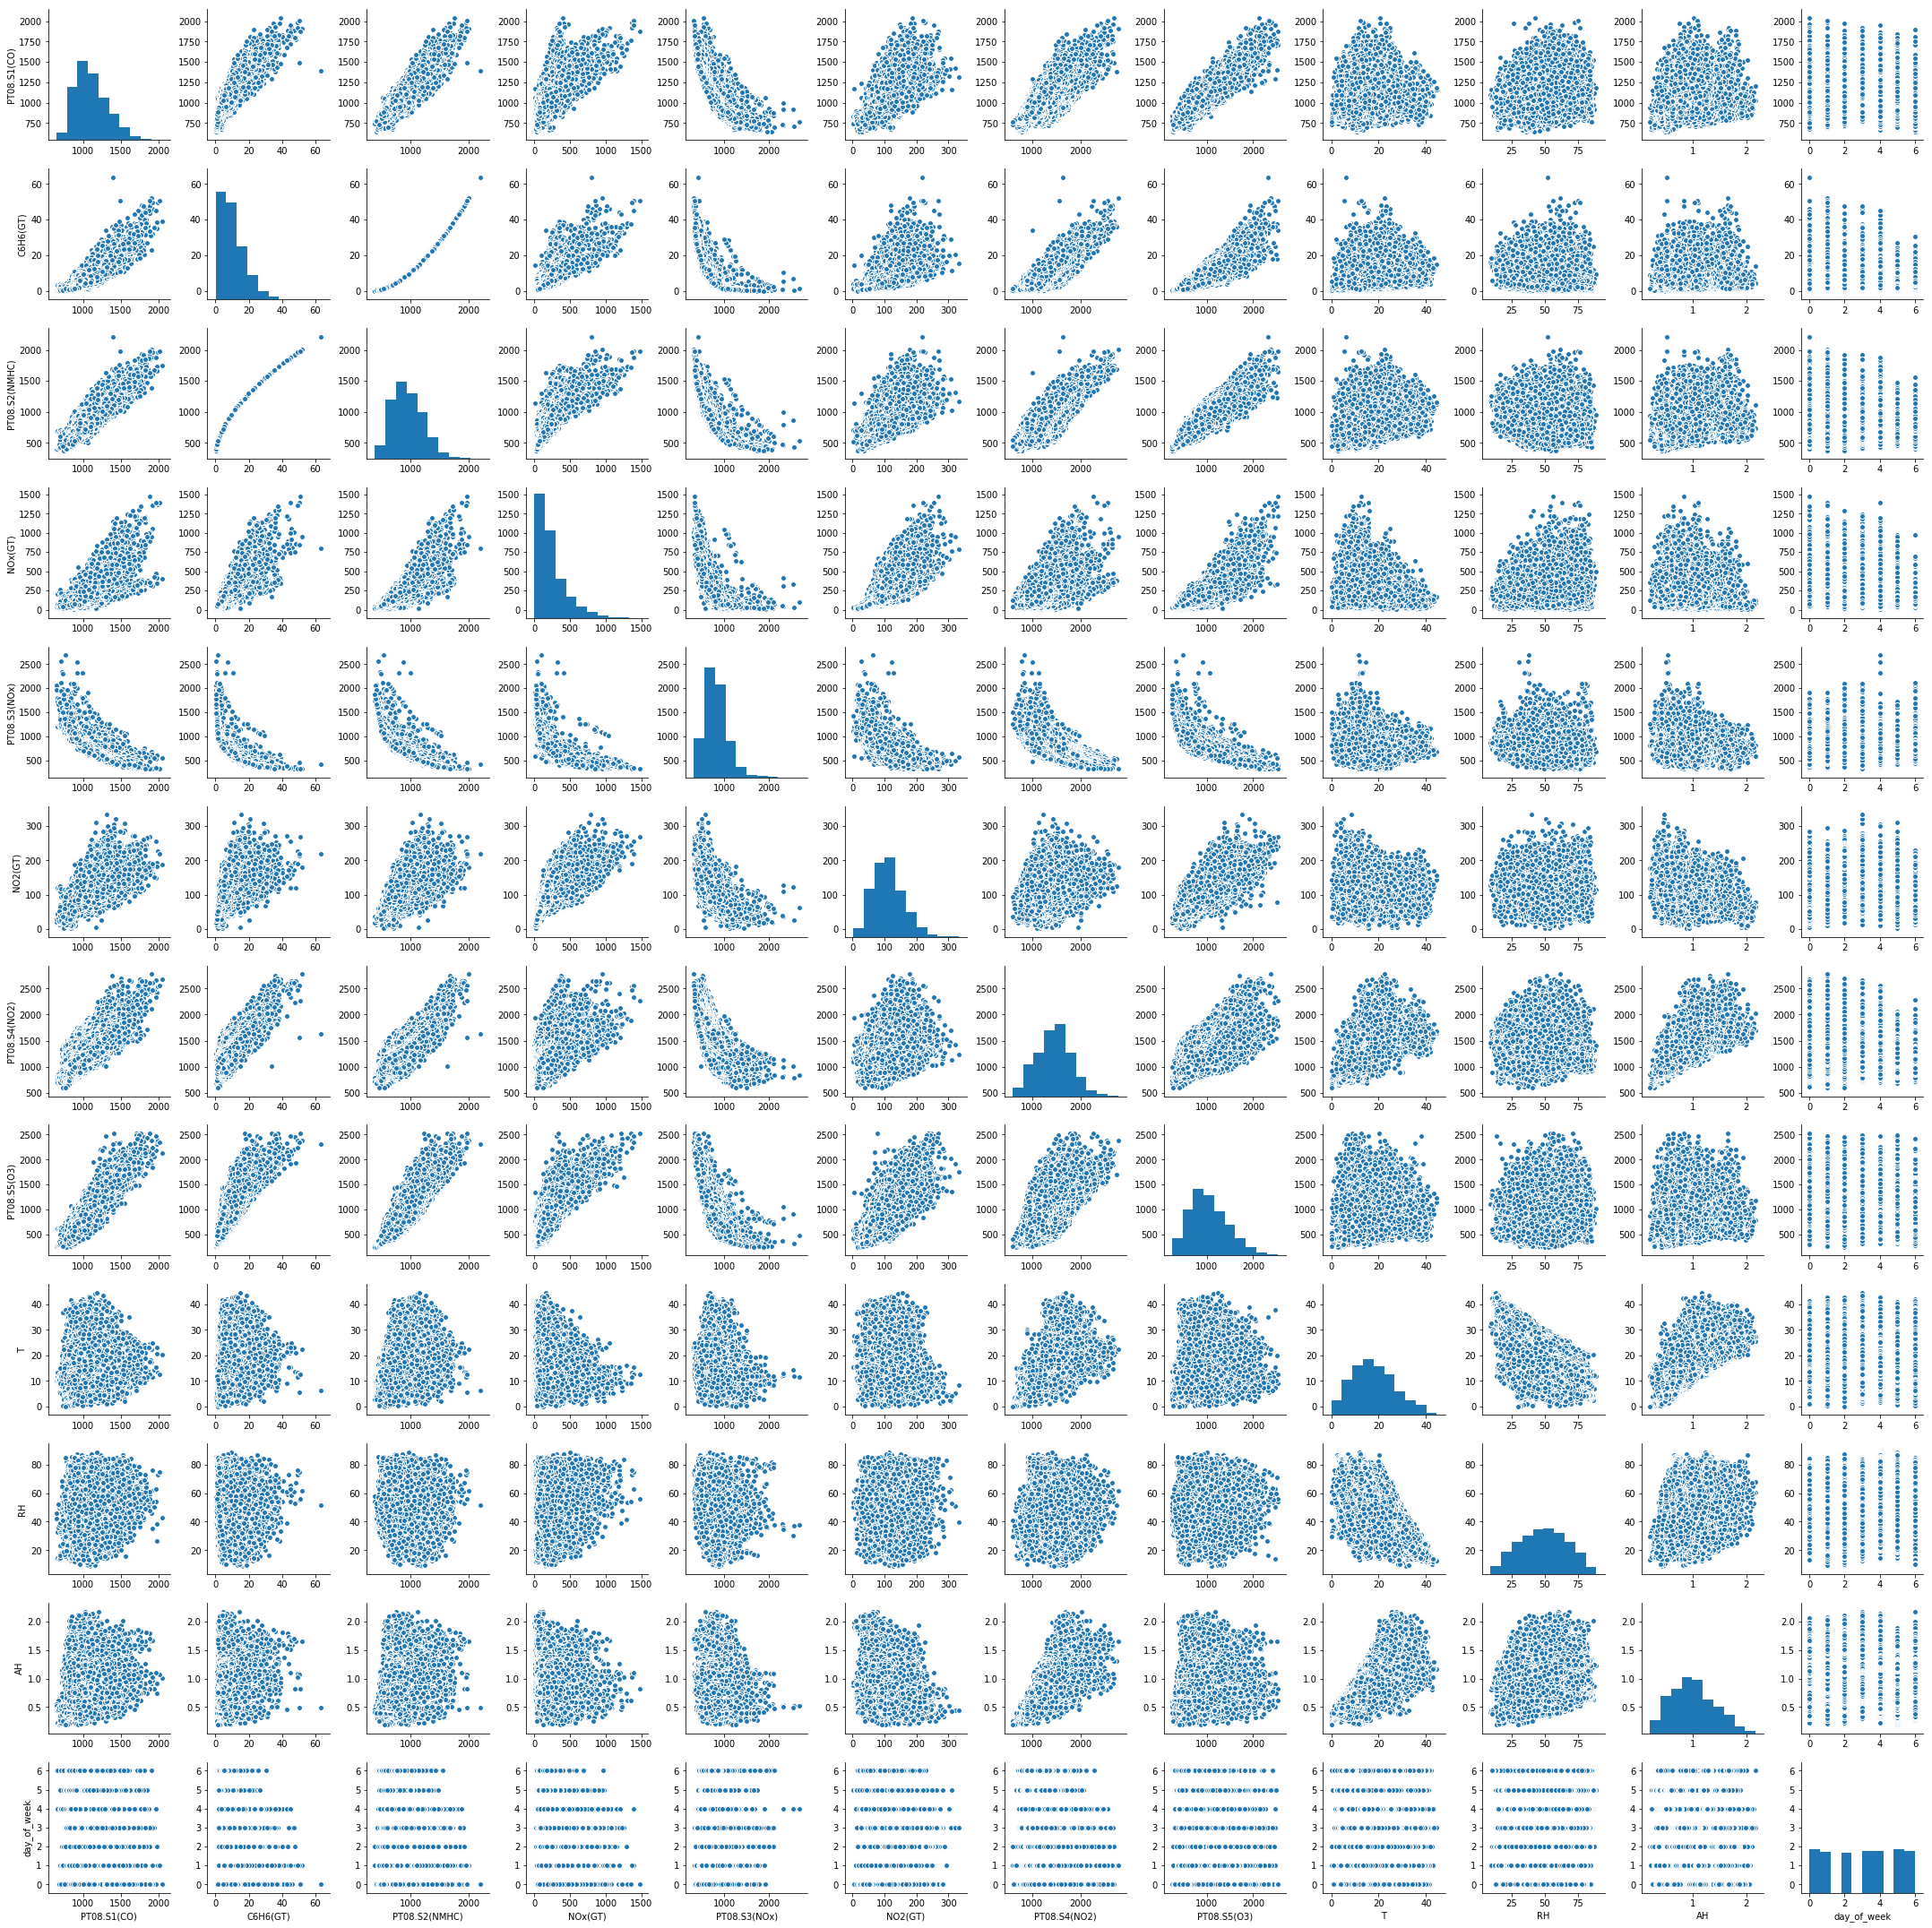

In [20]:
sns.pairplot(df.drop(labels=['month','seasson'],axis=1))

Text(0.5,1,'CO2 vs NOx')

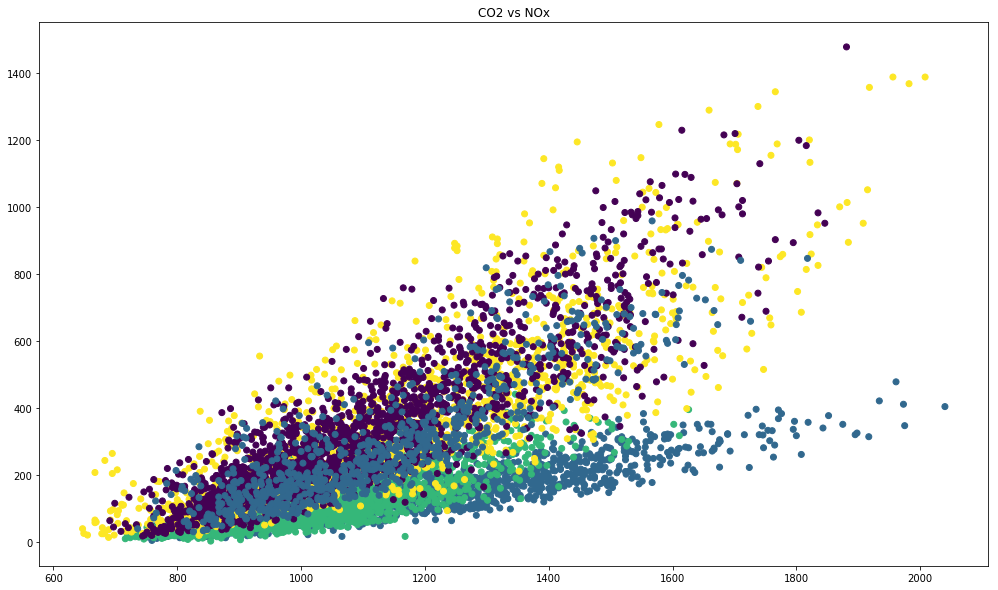

In [21]:
plt.subplots(figsize=(17,10))
plt.scatter(df['PT08.S1(CO)'],df['NOx(GT)'], c=df['seasson'])
plt.title('CO2 vs NOx')

Text(0.5,1,'T vs NOx')

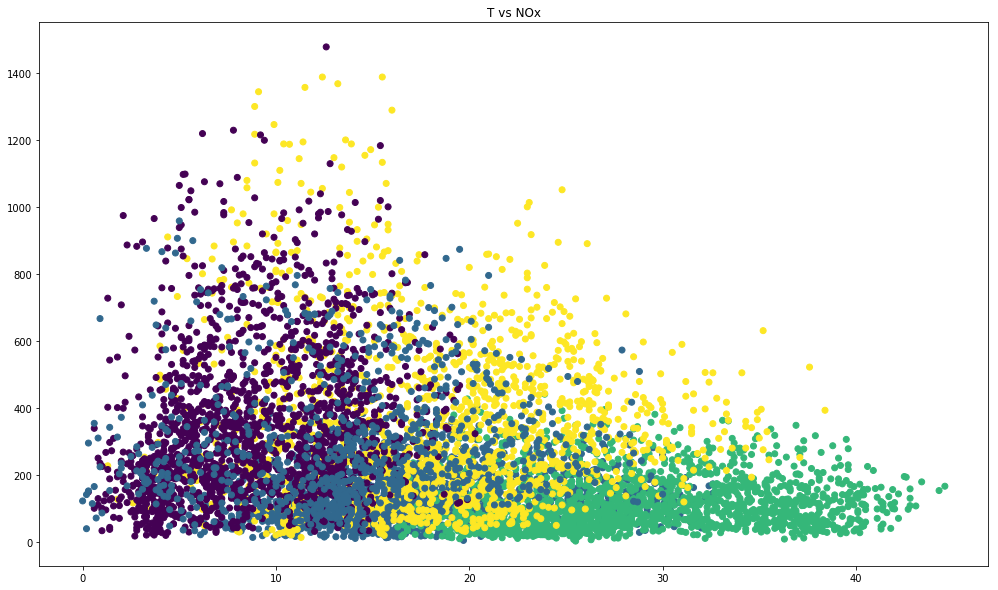

In [22]:
plt.subplots(figsize=(17,10))
plt.scatter(df['T'],df['NOx(GT)'], c=df['seasson'])
plt.title('T vs NOx')

Text(0.5,1,'CO2 vs NOx')

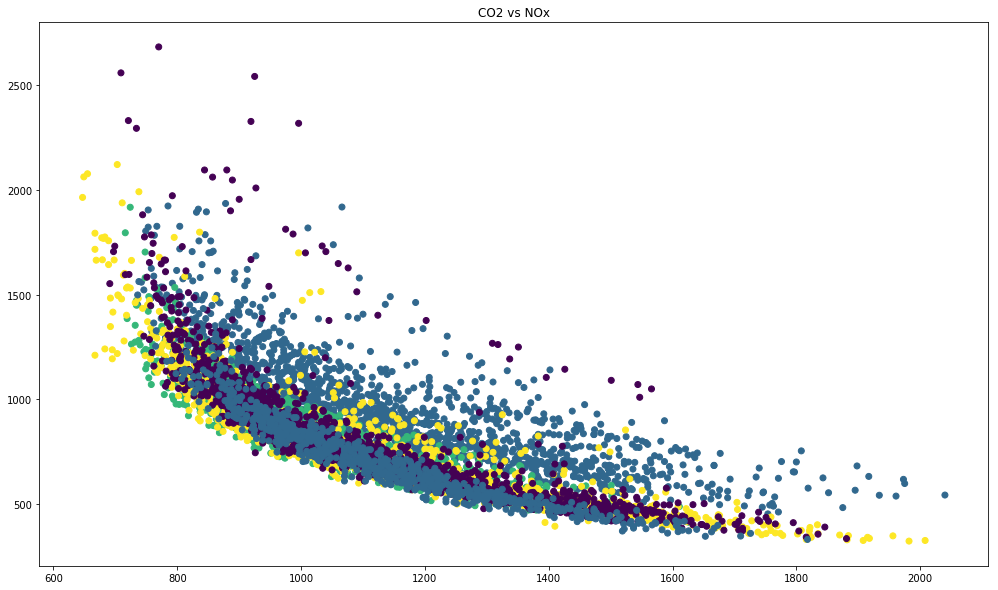

In [23]:
plt.subplots(figsize=(17,10))
plt.scatter(df['PT08.S1(CO)'],df['PT08.S3(NOx)'], c=df['seasson'])
plt.title('CO2 vs NOx')

Text(0.5,1,'CO2 vs NOx')

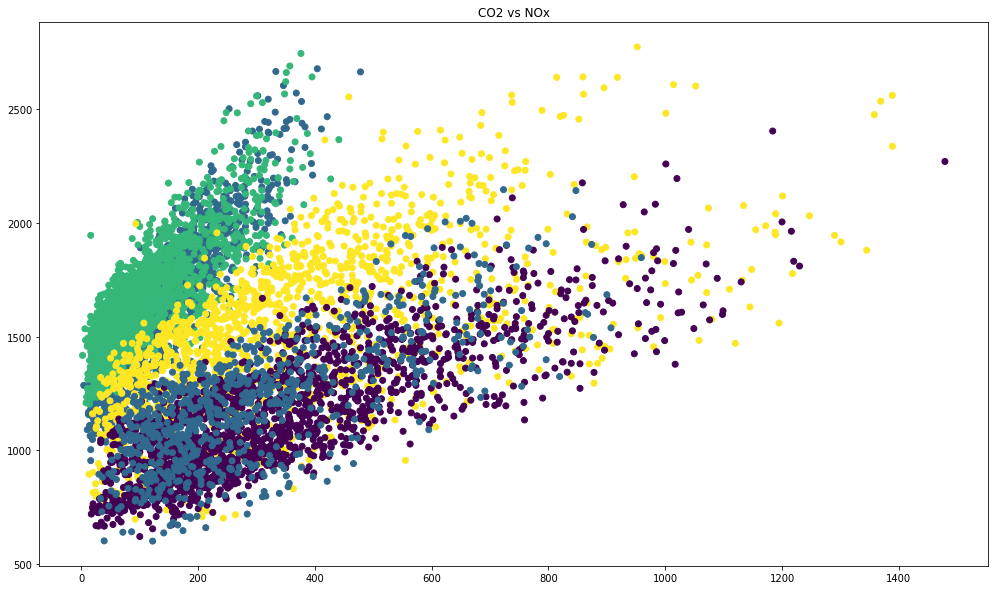

In [24]:
plt.subplots(figsize=(17,10))
plt.scatter(df['NOx(GT)'],df['PT08.S4(NO2)'], c=df['seasson'])
plt.title('CO2 vs NOx')

In [25]:
df.columns

Index(['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'timestamp',
       'month', 'seasson', 'day_of_week'],
      dtype='object')

Text(0.5,1,'C6H6 vs NMHC')

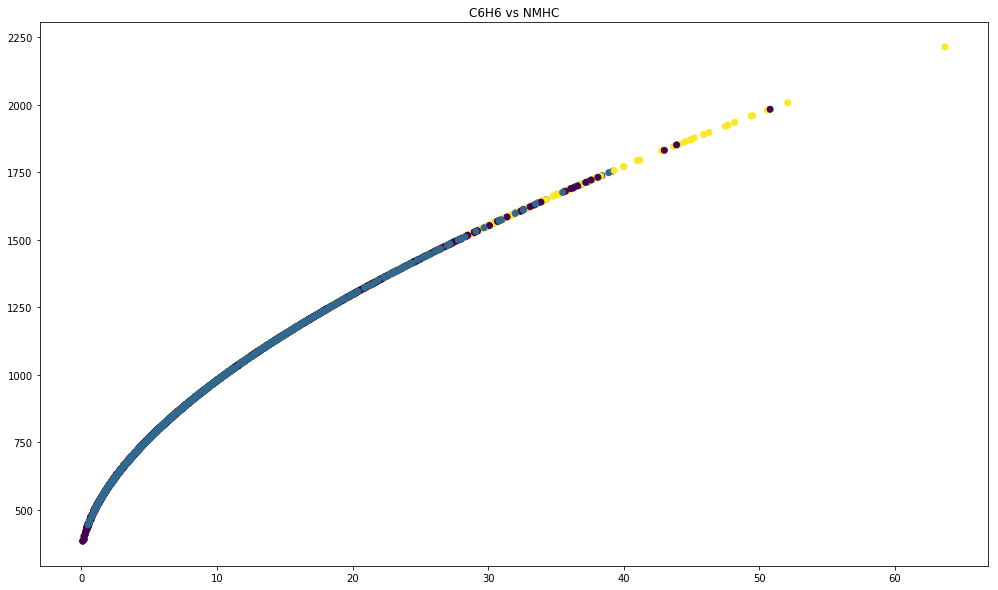

In [26]:
plt.subplots(figsize=(17,10))
plt.scatter(df['C6H6(GT)'],df['PT08.S2(NMHC)'], c=df['seasson'])
plt.title('C6H6 vs NMHC')

In [27]:
df.to_csv('../datasets/clean_airQuality.csv')

# Analysis finished!